# **8.4 20 Newsgroup**

In [1]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [2]:
type(news_data) # bunch는 dict와 유사한 데이터타입

sklearn.utils._bunch.Bunch

In [3]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
pd.Series(news_data.target).value_counts().sum() # 데이터 갯수

18846

In [8]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [9]:
from sklearn.datasets import fetch_20newsgroups

# 본문 내용만 뽑아야한다. 헤더에는 주제를 예측할 수 있는 요소가 너무 쉽게 있음
# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


### **Feature Vectorization**

**주의: 학습 데이터에 대해 fit( )된 CountVectorizer를 이용해서 테스트 데이터를 피처 벡터화 해야함.**  
테스트 데이터에서 다시 CountVectorizer의 fit_transform()을 수행하거나 fit()을 수행 하면 안됨.   
이는 이렇게 테스트 데이터에서 fit()을 수행하게 되면 기존 학습된 모델에서 가지는 feature의 갯수가 달라지기 때문임.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


11314개의 문서에서 단어가 101631개 만들어졌다.

In [27]:
X_test_cnt_vect.shape

(7532, 101631)

In [30]:
# cnt_vect.fit(X_test)
# X_test_cnt_vect = cnt_vect.transform(X_test)
# print('학습 데이터 Text의 CountVectorizer Shape:',X_test_cnt_vect.shape)

# (7532, 71018) 피쳐 갯수가 달라진다.

train data에 없는 단어가 test data에 있을 수 있다. 이런경우 매트릭스에 관련된 정보는 없다.

In [24]:
print(X_test_cnt_vect)

  (0, 2878)	1
  (0, 4681)	1
  (0, 12266)	1
  (0, 41127)	1
  (0, 42859)	1
  (0, 51136)	1
  (0, 56819)	1
  (0, 86525)	1
  (0, 87985)	1
  (0, 88532)	1
  (1, 18521)	1
  (1, 20259)	2
  (1, 22940)	1
  (1, 23442)	1
  (1, 24943)	1
  (1, 30763)	1
  (1, 38758)	1
  (1, 41127)	1
  (1, 46366)	1
  (1, 57393)	1
  (1, 61072)	1
  (1, 67670)	2
  (1, 68080)	2
  (1, 72502)	1
  (1, 76599)	1
  :	:
  (7530, 88882)	1
  (7530, 88955)	1
  (7530, 89360)	11
  (7530, 89404)	1
  (7530, 89701)	1
  (7530, 89866)	1
  (7530, 90130)	1
  (7530, 90328)	1
  (7530, 92156)	1
  (7530, 92629)	1
  (7530, 92671)	1
  (7530, 92706)	1
  (7530, 95770)	2
  (7530, 95844)	2
  (7530, 96247)	5
  (7530, 96454)	2
  (7530, 96532)	4
  (7530, 96917)	4
  (7530, 96939)	1
  (7530, 97332)	1
  (7530, 99908)	1
  (7530, 99911)	1
  (7530, 99943)	1
  (7530, 99954)	2
  (7530, 101277)	1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
# LogisticRegression의 solver를 기본값인 lbfgs이 아닌 liblinear로 설정해야 학습이 오래 걸리지 않음. 
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)

print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.617


벡터로 만드는 것 자체는 예측이 아니고, 다른 알고리즘에 넣을 수 있게 변환하는 과정

In [12]:
pred

array([ 4, 11,  2, ...,  6, 17,  9])

**TF-IDF Feature Transform**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.678


**stop words filtering, ngram (1,2)**

In [31]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [33]:
X_train_tfidf_vect.shape # 엄청 많이 늘어난다.

(11314, 943453)

### **LogisticRegression C param Tuning with GridSearchCV**

alpha는 릿지와 라쏘에 쓰이던 계수로 규제를 강하게 하겠다는 의미. c는 alpha의 역수  

회귀당시, 훈련데이터를 맞추는데에만 급급하여 회귀계수가 커져서 오버피팅이 되는 것을 보았다,  

릿지와 라쏘는 그것을 막는 것이었음.

In [34]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.704


### **Scikit-Learn Pipeline, GridSearchCV**

TfidfVectorizer도 fit, transform을 쓰고 LogisticRegression도 fit transform을 사용했다. 메소드가 중복으로 사용되는것을 좀 완화하기 위해 pipeline을 적용할 수 있다. 

In [35]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.704


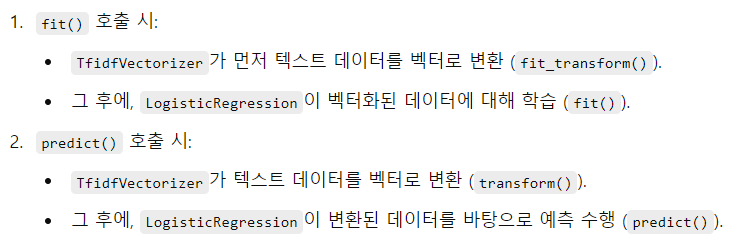

파이프라인 마지막에 있는 메소드가 predict를 쓰는지, transform을 쓰는지 확인해서 파이프라인도 동일하게 따라간다.

In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2)],
           'tfidf_vect__max_df': [100, 300],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 300, 'tfidf_vect__ngram_range': (1, 2)} 0.7546412412863363
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.704


Logistic Regression 이외에도 SVM, Naive Bayes도 희소 행렬 기반의 텍스트 분류에 자주 사용이 된다.